**Author: Christian Urcuqui**

**Date: 3 August 2018**

# notMNIST

This is an example to process a notMNIST dataset, it is integrated by handwritten digits, the MNSIT (Mixed National Institute of Standards and Technology) is one of the most image dataset used in image processing and machine learning. 
We could say that notMNIST is a good example to say "hello world" in tensorflow because a lot of examples are available and some of them took this dataset as the first steps in deep learning, such as, since the application of a simple neural network with a softmax function until the application of a ConvNet architecture.


<img src="../../Utilities/notmnist.jpeg" width="250">

In this Jupyter notebook I will explore different examples in order to know what is the best solution, for that the notebook's content is divided en these sections:

- [Libraries](#Libraries)
- [Dataset](#Dataset)
- [Classical-ML](#Classical-ML)
- [Udacity](#Udacity)
- [Book](#Book)
- [References](#References).



To resolve this problem I used two example sources, one from the book [1] and the last one from the Udemy Course [2].


## Libraries

+ **imageio 2.2.0**, it is python library that provides an easy interace to read an write a wide range of image data.
+ **matploit**, is a specially library to make plots 
+ **numpy**, it is a library make math and scientific operations 
+ **tarfile**, it allows use to process tar files
+ **IPython**, it is a library from Jupyter
+ **six**, it is another Python library, the idea of this is for smoothing over the differences beetween the Python versions. 


In [1]:
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline



C:\Users\rhaps\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Dataset 
The next code will download the dataset to our local machine. The repository has characters rendered in a variety of fonts on 28x28 image, moreover, it only has the label images since the 'A' to the 'J', specifically, 10 classes. 

In [3]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified .\notMNIST_large.tar.gz
Found and verified .\notMNIST_small.tar.gz


### Extract the dataset

Once the datasets are downloaded, the next code will extract these files 

In [4]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

.\notMNIST_large already present - Skipping extraction of .\notMNIST_large.tar.gz.
['.\\notMNIST_large\\A', '.\\notMNIST_large\\B', '.\\notMNIST_large\\C', '.\\notMNIST_large\\D', '.\\notMNIST_large\\E', '.\\notMNIST_large\\F', '.\\notMNIST_large\\G', '.\\notMNIST_large\\H', '.\\notMNIST_large\\I', '.\\notMNIST_large\\J']
.\notMNIST_small already present - Skipping extraction of .\notMNIST_small.tar.gz.
['.\\notMNIST_small\\A', '.\\notMNIST_small\\B', '.\\notMNIST_small\\C', '.\\notMNIST_small\\D', '.\\notMNIST_small\\E', '.\\notMNIST_small\\F', '.\\notMNIST_small\\G', '.\\notMNIST_small\\H', '.\\notMNIST_small\\I', '.\\notMNIST_small\\J']


Another way is to download the data from the tensorflow repository  (in its examples)

In [5]:
DATA_DIR = '/tmp/data'
NUM_STEPS= 1000
MyINIBATCH_SIZE = 100

tdata = input_data.read_data_sets(DATA_DIR, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Udacity

"Let's take a peek at some of the data to make sure it looks sensible. Each exemple should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display."

### Problem 1

In [6]:
print(data.train)

print(data.train.images.shape) ## 550000 points for training with of 28 by 28 pixels

from IPython.display import display, Image

(55000, 784)


In [12]:
display(Image(filename='notMNIST_small/A/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png'))

In [9]:
os.listdir("notMNIST_small/A")

['MDEtMDEtMDAudHRm.png',
 'MDRiXzA4LnR0Zg==.png',
 'MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png',
 'MlJlYmVsc0RldXgtQmxhY2sub3Rm.png',
 'MlRvb24gU2hhZG93LnR0Zg==.png',
 'MlRvb24yIFNoYWRvdy50dGY=.png',
 'MTAuMTUgU2F0dXJkYXkgTmlnaHQgQlJLLnR0Zg==.png',
 'MTFTMDEgQmxhY2sgVHVlc2RheSBPZmZzZXQudHRm.png',
 'MTggSG9sZXMgQlJLLnR0Zg==.png',
 'MTh0aENlbnR1cnkudHRm.png',
 'MTIgV2FsYmF1bSBJdGFsaWMgMTMyNjMudHRm.png',
 'MTJTYXJ1WWVsbG93Rm9nLnR0Zg==.png',
 'Nng3b2N0IEFsdGVybmF0ZSBFeHRyYUxpZ2h0LnR0Zg==.png',
 'Nng3b2N0IEFsdGVybmF0ZSBSZWd1bGFyLnR0Zg==.png',
 'NXRoR3JhZGVyLnR0Zg==.png',
 'OC1iaXQgTGltaXQgTyBCUksudHRm.png',
 'OEJhbGxTY3JpcHRTQ2Fwc1NTSyBJdGFsaWMudHRm.png',
 'OTExIFBvcnNjaGEgSXRhbGljLnR0Zg==.png',
 'OXNxZ3JkIFRoaW4udHRm.png',
 'Q09ERTNYLnR0Zg==.png',
 'Q0cgT21lZ2EudHRm.png',
 'Q0NDb21pY3JhenktQm9sZEl0YWxpYy50dGY=.png',
 'Q0NTcG9va3l0b290aC1SZWd1bGFyLnR0Zg==.png',
 'Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png',
 'Q0sgUGluay50dGY=.png',
 'Q1FOLU1vbGVjdWxhci1EeW5hbW8tUmVndWxhci5vdGY=.png',
 'Q290cmFu

In [16]:
display(Image(filename="notMNIST_small/A/"+ os.listdir("notMNIST_small/A")[30]))

### Load the data in a more manageable format

The next code will format the entire dataset into a 3D array (image index, x,y) of floating point values, its normalized will have aproximately zero mean and standard deviation ~0.5 and it let the training easier down the road. 

In [6]:
image_size = 28 # Pixel width and height
pixel_depth = 255.0 # Number of levels per pixel.


def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)
    print(dataset.shape)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            # this is the operation to normalize each image, 
            image_data = (imageio.imread(image_file).astype(float) - pixel_depth /2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except (IOError, ValueError) as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
            
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' % (num_images, min_num_images))
    
    print("Full dataset tensor:", dataset.shape)
    print("Mean:", np.mean(dataset))
    print("Standard deviation:", np.std(dataset))
    return dataset

def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)  
    return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

.\notMNIST_large\A.pickle already present - Skipping pickling.
.\notMNIST_large\B.pickle already present - Skipping pickling.
.\notMNIST_large\C.pickle already present - Skipping pickling.
.\notMNIST_large\D.pickle already present - Skipping pickling.
.\notMNIST_large\E.pickle already present - Skipping pickling.
.\notMNIST_large\F.pickle already present - Skipping pickling.
.\notMNIST_large\G.pickle already present - Skipping pickling.
.\notMNIST_large\H.pickle already present - Skipping pickling.
.\notMNIST_large\I.pickle already present - Skipping pickling.
.\notMNIST_large\J.pickle already present - Skipping pickling.
.\notMNIST_small\A.pickle already present - Skipping pickling.
.\notMNIST_small\B.pickle already present - Skipping pickling.
.\notMNIST_small\C.pickle already present - Skipping pickling.
.\notMNIST_small\D.pickle already present - Skipping pickling.
.\notMNIST_small\E.pickle already present - Skipping pickling.
.\notMNIST_small\F.pickle already present - Skipping pi

### Problem 2

"Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use pmatplotlib.pyplot."

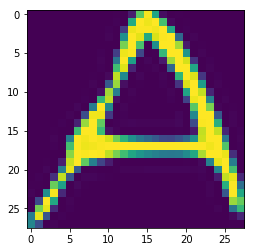

In [7]:
pickle_file = train_datasets[0]  # index 0 should be all As, 1 = all Bs, etc.
with open(pickle_file, 'rb') as f:
    letter_set = pickle.load(f)  # unpickle
    sample_idx = np.random.randint(len(letter_set))  # pick a random image index
    sample_image = letter_set[sample_idx, :, :]  # extract a 2D slice
    plt.figure()
    plt.imshow(sample_image)  # display it

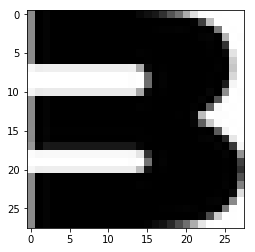

In [19]:
pickle_file = train_datasets[1]
with open(pickle_file, 'rb') as f:
    letter_set = pickle.load(f)
    simple_idx =  np.random.randint(len(letter_set))
    sample_image = letter_set[sample_idx, :, :]
    plt.figure()
    plt.imshow(sample_image, cmap='Greys')

### Problem 3

"Another check: we expect the data to be balanced across classes. Verify that."

In [9]:
for i in range(0,len(train_datasets)):
    with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f) 
        print(len(letter_set))

52909
52909
52909
52909
52909
52909
52909
52909
52909
52909


We are going to merge and prune the traning data, and in the same way the validation dataset for hyperparameter tuning.

In [10]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes =  len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes
    
    start_v, start_t = 0, 0 
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class + tsize_per_class
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    
    return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [12]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

### Problem 4

"Convince yourself that the data is still good after shuffling!"

In [34]:
train_dataset, train_labels = randomize(train_dataset, train_labels)
print(train_labels)
print(len(train_labels))

[2 7 9 ... 6 2 6]
200000


Finally, let's save the data for later reuse:

In [13]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
    f = open(pickle_file, 'wb')
    save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [14]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800506


### Problem 5

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it. Measure how much overlap there is between training, validation and test samples.

Optional questions:

+ What about near duplicates between datasets? (images that are almost identical)
+ Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.

### Problem 6

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

In [26]:
from sklearn.linear_model import LinearRegression

In [57]:
reg = LinearRegression().fit(train_dataset.reshape(1, -1)[0,0:100], train_labels[0:100])
#reg.score(train_dataset, train_labels)
#reg.coef_
#reg.intercept_


ValueError: Expected 2D array, got 1D array instead:
array=[-0.5        -0.5        -0.5        -0.5        -0.5        -0.49607843
 -0.49607843 -0.5        -0.49215686 -0.5        -0.39411765  0.00196078
 -0.20588236 -0.0372549   0.2254902   0.22156863  0.11176471 -0.09607843
  0.05686275 -0.25686276 -0.5        -0.42941177 -0.49215686 -0.5
 -0.49215686 -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.49607843
 -0.49607843 -0.5        -0.43333334 -0.23333333 -0.2647059  -0.24509804
 -0.2372549  -0.24117647 -0.2372549  -0.2372549  -0.21372549 -0.38235295
 -0.49215686 -0.35882354 -0.48431373 -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.49607843
 -0.5        -0.36666667 -0.35882354 -0.39803922  0.2529412   0.2764706
  0.2254902   0.24117647  0.2529412   0.24901961  0.24901961  0.24901961
  0.24509804  0.24509804  0.24117647  0.26078433  0.24117647  0.3156863
 -0.28431374 -0.39019608 -0.00588235 -0.4882353  -0.5        -0.49607843
 -0.5        -0.5        -0.49607843 -0.49215686 -0.5        -0.34313726
 -0.41764706 -0.327451    0.49215686  0.08431373  0.17450981  0.5
  0.49215686  0.5         0.5         0.5       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
train_dataset.reshape(1, -1).shape
train_dataset.reshape(1, -1)[0,0:100]

array([-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.49607843, -0.49607843, -0.5       , -0.49215686, -0.5       ,
       -0.39411765,  0.00196078, -0.20588236, -0.0372549 ,  0.2254902 ,
        0.22156863,  0.11176471, -0.09607843,  0.05686275, -0.25686276,
       -0.5       , -0.42941177, -0.49215686, -0.5       , -0.49215686,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.49607843, -0.49607843, -0.5       , -0.43333334, -0.23333333,
       -0.2647059 , -0.24509804, -0.2372549 , -0.24117647, -0.2372549 ,
       -0.2372549 , -0.21372549, -0.38235295, -0.49215686, -0.35882354,
       -0.48431373, -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.49607843,
       -0.5       , -0.36666667, -0.35882354, -0.39803922,  0.2529412 ,
        0.2764706 ,  0.2254902 ,  0.24117647,  0.2529412 ,  0.24

In [46]:
train_labels[0:100]

array([2, 7, 9, 5, 0, 9, 8, 4, 5, 9, 7, 8, 1, 0, 4, 8, 1, 9, 5, 8, 3, 0,
       0, 5, 3, 9, 3, 5, 3, 9, 4, 1, 4, 8, 1, 8, 2, 9, 8, 6, 2, 4, 4, 1,
       4, 2, 3, 1, 0, 6, 2, 7, 1, 5, 1, 4, 3, 2, 4, 0, 2, 6, 5, 5, 1, 0,
       9, 6, 0, 9, 6, 3, 8, 6, 1, 5, 1, 5, 4, 3, 9, 7, 0, 8, 1, 3, 2, 8,
       9, 1, 4, 2, 7, 1, 8, 0, 7, 2, 8, 5])

## Book

The first step that the book focuses is to unroll the image pixels as a single long vector denoted x:
<br>

$xw^0 = \sum_{}x_{i}w_{i}^0$
<br>

The idea is apply an algorithm to transform each pixel's wights in a range of 0 and 1 using the softmax function, next, with the sufficient evidence for each of the 10 possible digits. The final assigment will be the digit which accumulates the most evidence:

$digit=argmax(xW)$




In [5]:
# In the placeholder could be supplied when triggering it. Moreover, the variable is an element manipulated by the computation.
# The image is a placeholder because it could be supplied by us when running the computation graph.
# each image is of size 724 (28*28 pixels unrolled in into a single vector)

# The size [None,784] menas that each image of size 784, and None is an indicator that we are not currently specificyng how many of these images
# we will use at once
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))

# we have 10 digits, same like the last two code lines, we are specifiying a placeholder to the 10 digits
y_true = tf.placeholder(tf.float32, [None, 10])
# we are going to use the function matmul to multiply to matrixes
y_pred = tf.matmul(x, W)

# note that in the book was used a deprecated method of softmax cross entropy. 
# Cross_entropy is the measure of similarity - a natural choice when the model outputs probabilities - this element is
# usually called the loss function - the softmax function - 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred, labels=y_true))

# The next step is how we are going to minimize the loss function, for this case we will use the gradient descent approach
# 0.5 is the learning rate 
gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# This is the evaluation proccedure 
correct_mask = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

with tf.Session() as sess:
    # The next line will intialize all variables 
    sess.run(tf.global_variables_initializer())
    #train process with the number of steps and the minibatch size
    for _ in range(NUM_STEPS):
        # the next line gets a subset of the data 
        batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
        # the session run will use all the process in order to train our neural network
        sess.run(gd_step, feed_dict={x: batch_xs, y_true: batch_ys})

    # the results of our testing will be saved in the accuracy variable
    ans = sess.run(accuracy, feed_dict={x: data.test.images, y_true: data.test.labels})

print ("Accuracy: {:.4}%".format(ans*100))

Accuracy: 91.9%


## Tensorflow tutorial for begginers

The page of tensorflow has some tutorials that allow any person to know how the theory is apply while the code is used. So, I would like to take some parts of them in order make some conclusions of it.

### Softmax Regression

In the tensor flow tutorial were used a softmax regression function like the book's example, but, they included the bias variable 

$Evidence = \sum_{j}W_{i,j}x_{j}+b_{i}$

The index $j$ represents each pixel in the image x, and  $i$  is the class. They explain that when the NN has enough evidence of the target, the idea is use the softmax function in order to get its probabilities 

$y=Softmax(Evidence)$

$y=Softmax(Wx+b)$

In another notebook I commented about the softmax function and its use in this area, also, the next image from the tutorial allow us to understand how is the architecture of the NN.

<image src="https://www.tensorflow.org/images/softmax-regression-scalargraph.png" height="250" weight="250">
    
### Cross entropy

Cross entropy is the way to calculate the cost or the lost of our model, in other words it allows us to understand how far is the model's results to the desire outcomes. This is the function:


$H_{y'}(y) = - \sum_{i}y'_{i}log(y_{i})$

    
    

In [ ]:
# this is the solution proposed in the tutorial

x = tf.placeholder(tf.float32,[None, 784])

W = tf.Variable(tf.zeros([784, 10]))

b = tf.Variable(tf.zeros([10]))

tf.nn.softmax(tf.matmul(W,x) + b)


### References

[1] Hope, T., Resheff, Y. S., & Lieder, I. (2017). Learning TensorFlow: A Guide to Building Deep Learning Systems. " O'Reilly Media, Inc.".

[2] Udacity. Deep Learning. 

[3] https://www.tensorflow.org/versions/r1.2/get_started/mnist/beginners